<a href="https://colab.research.google.com/github/ryu-jihye/Use-Public-information/blob/main/%EB%8F%84%EC%8B%9C%EA%B3%B5%EC%9B%90%EC%A0%95%EB%B3%B41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,740 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144865 files and d

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
plt.rc("axes", unicode_minus=False)

In [5]:
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

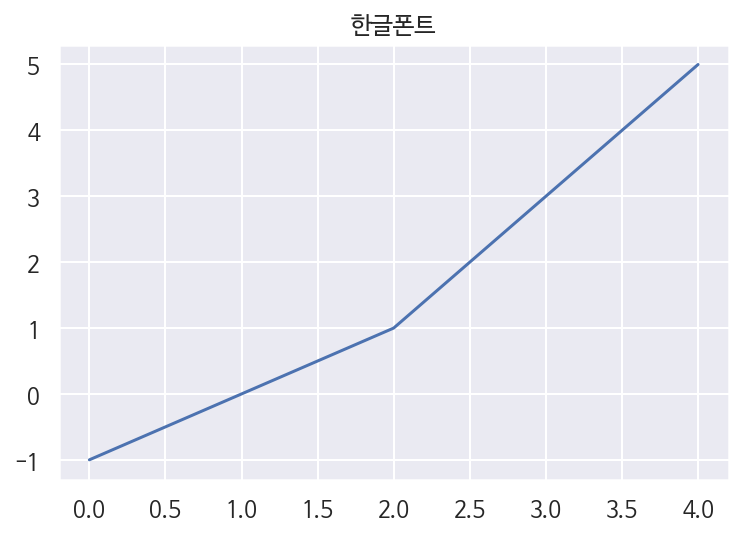

In [6]:
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

In [7]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [10]:
df = pd.read_csv('/content/gdrive/My Drive/data/전국도시공원표준데이터.csv',  encoding="cp949")
df.shape

(18137, 20)

In [11]:
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
1,26440-00002,압곡공원,근린공원,NaN,부산광역시 강서구 구랑동 1219,35.154655,128.854727,33756.0,4,NaN,NaN,NaN,"배드민턴장, 족구장, 파고라4, 안내판, 볼라드7, 데크435.11㎡, 데크계단19...",2008-02-28,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
2,26440-00003,서연정공원,소공원,NaN,부산광역시 강서구 대저1동 1330-7,35.216183,128.969558,646.0,7,NaN,NaN,NaN,"앉음벽13.57m, 트렐리스3, 안내판2, 플랜트2, 파고라, 평의자4",2013-01-23,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
3,26440-00004,용두공원,어린이공원,NaN,부산광역시 강서구 대저2동 1870-67,35.183679,128.956007,1620.0,NaN,"조합놀이기구, 그네",NaN,NaN,"정자, 농구장, 평의자6",1998-07-25,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN
4,26440-00005,새동내공원,어린이공원,NaN,부산광역시 강서구 대저2동 2407-1,35.174568,128.950612,1009.0,8,"조합놀이기구, 그네, 흔들놀이기구2",NaN,NaN,"정자, 평의자14, 트렐리스2, 안내판, 볼라드",1995-04-07,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          18137 non-null  object 
 1   공원명           18137 non-null  object 
 2   공원구분          18137 non-null  object 
 3   소재지도로명주소      8039 non-null   object 
 4   소재지지번주소       17158 non-null  object 
 5   위도            18137 non-null  float64
 6   경도            18137 non-null  float64
 7   공원면적          18137 non-null  float64
 8   공원보유시설(운동시설)  4845 non-null   object 
 9   공원보유시설(유희시설)  6964 non-null   object 
 10  공원보유시설(편익시설)  5084 non-null   object 
 11  공원보유시설(교양시설)  1160 non-null   object 
 12  공원보유시설(기타시설)  3116 non-null   object 
 13  지정고시일         15225 non-null  object 
 14  관리기관명         17383 non-null  object 
 15  전화번호          16957 non-null  object 
 16  데이터기준일자       18137 non-null  object 
 17  제공기관코드        18137 non-null  object 
 18  제공기관명         18137 non-nu

In [14]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [17]:
round(df.isnull().mean() * 100, 2) #2는 소수 2째 자리까지 나오도록 하는 것

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

In [18]:
sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
# 별개로 결측시 시각화를 진행하기 위해 다시 sns 글씨체 정의하기

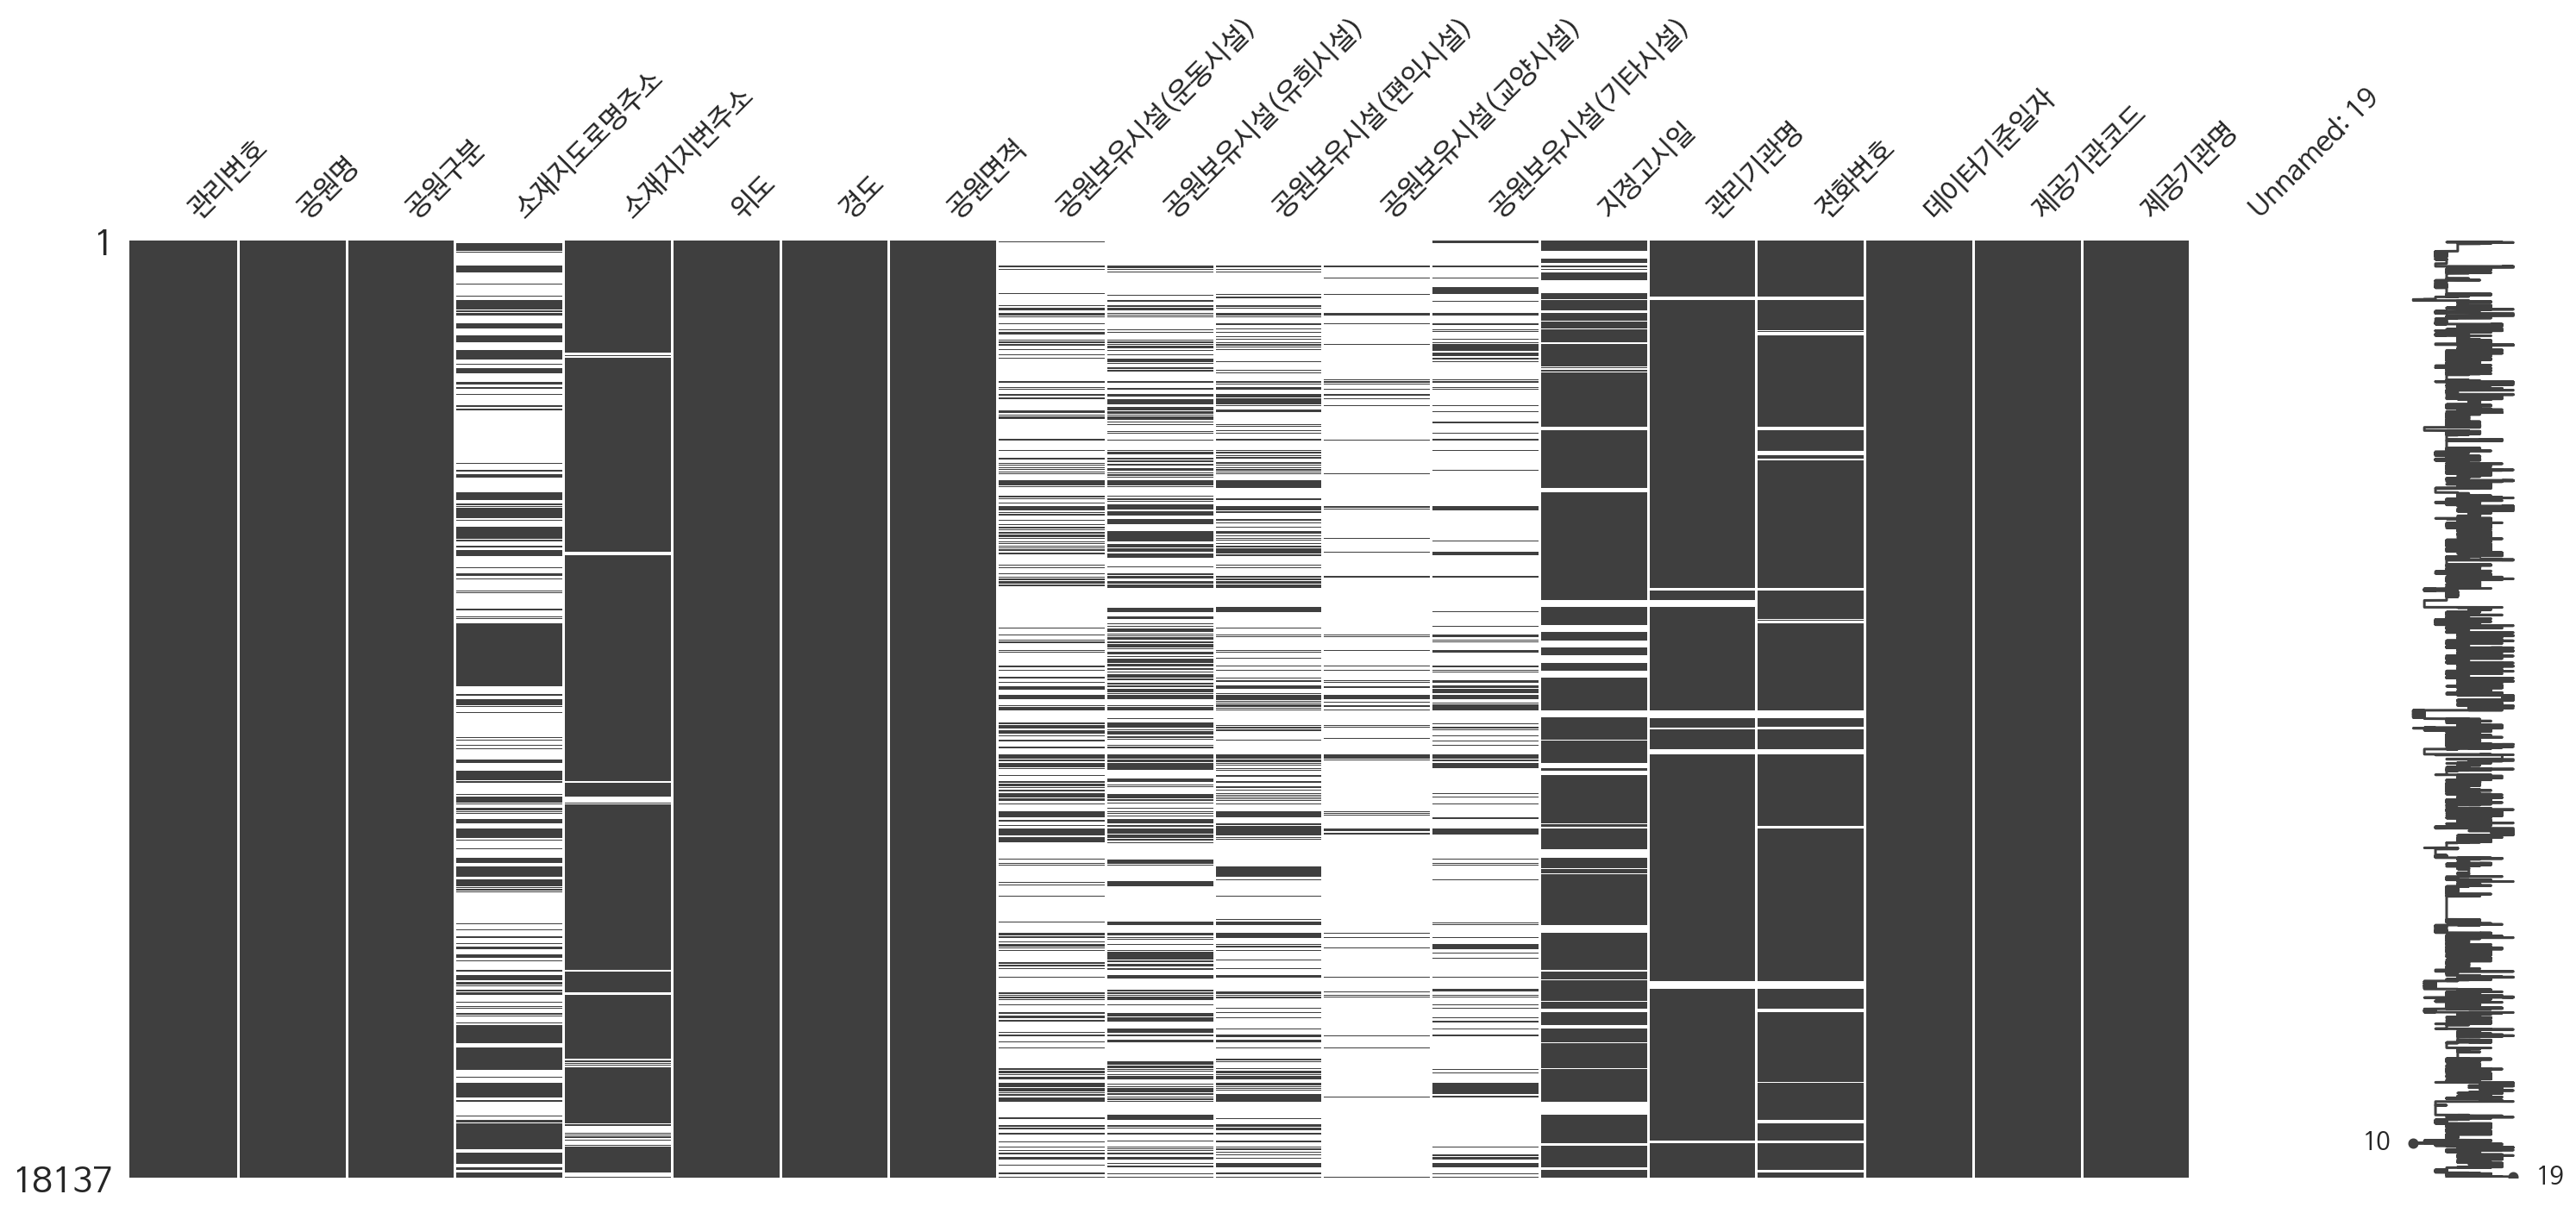

In [19]:
import missingno
missingno.matrix(df)

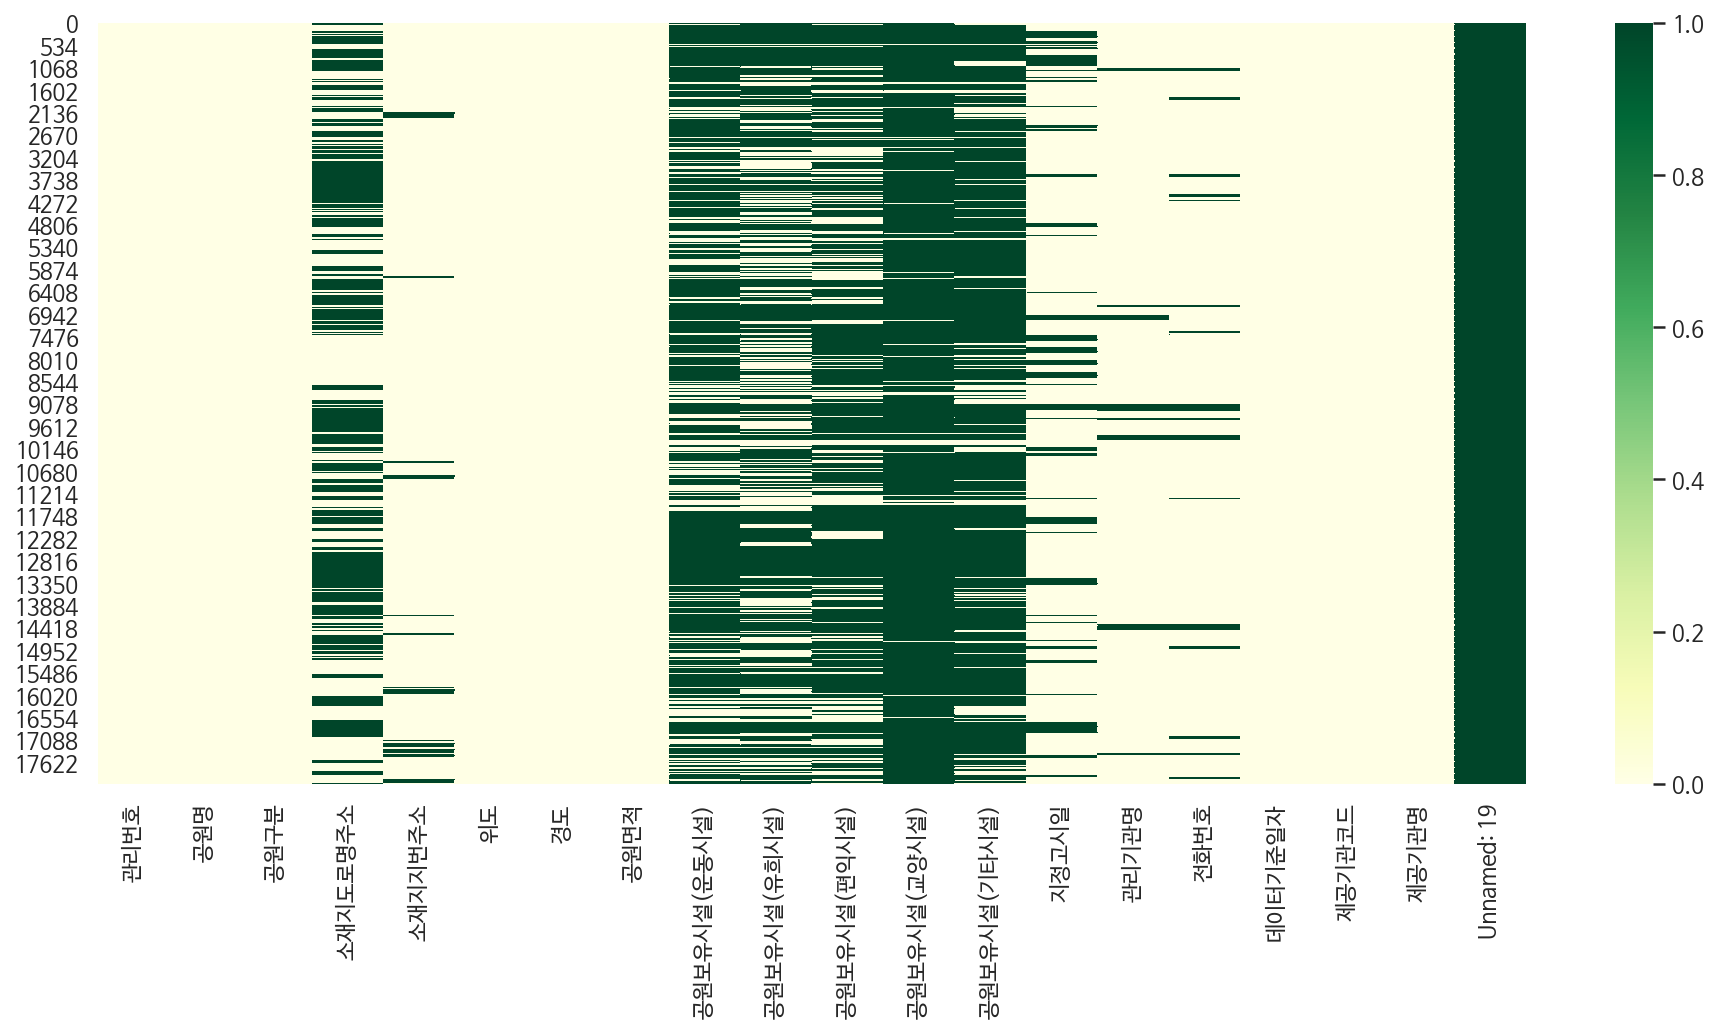

In [24]:
null = df.isnull()

plt.figure(figsize=(16, 7))
sns.heatmap(null, cmap="YlGn")

In [25]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [26]:
print(df.shape)
df = df.drop(["Unnamed: 19"], axis=1)
print(df.shape) #"Unnamed: 19" 제거

(18137, 20)
(18137, 19)


In [27]:
df['소재지도로명주소'].isnull().sum()

10098

In [28]:
df['소재지지번주소'].isnull().sum()

979

In [29]:
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape
# 소재지도로명주소, 소재지지번주소 둘 다 결측치 아님

(7060, 19)

In [31]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
#fillna를 통해 소재지지번주소 추가

In [32]:
df['소재지도로명주소'].isnull().sum()

0

In [33]:
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

In [36]:
df["시도"] = df['소재지도로명주소'].str.split(expand=True)[0]
df[["소재지도로명주소", "시도"]].head()

,소재지도로명주소,시도
0,부산광역시 강서구 구랑동 1199-7,부산광역시
1,부산광역시 강서구 구랑동 1219,부산광역시
2,부산광역시 강서구 대저1동 1330-7,부산광역시
3,부산광역시 강서구 대저2동 1870-67,부산광역시
4,부산광역시 강서구 대저2동 2407-1,부산광역시


In [37]:
df["구군"] = df['소재지도로명주소'].str.split(expand=True)[1]
df[["소재지도로명주소", "시도", "구군"]].head()

,소재지도로명주소,시도,구군
0,부산광역시 강서구 구랑동 1199-7,부산광역시,강서구
1,부산광역시 강서구 구랑동 1219,부산광역시,강서구
2,부산광역시 강서구 대저1동 1330-7,부산광역시,강서구
3,부산광역시 강서구 대저2동 1870-67,부산광역시,강서구
4,부산광역시 강서구 대저2동 2407-1,부산광역시,강서구


In [38]:
df["시도"].value_counts() #강원도와 강원 합칠 필요 있음

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         647
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
강원            1
Name: 시도, dtype: int64

In [40]:
df["시도"] = df["시도"].replace("강원", "강원도")
df["시도"].value_counts()

경기도        3318
전라남도       1882
경상남도       1825
서울특별시      1745
충청남도       1723
전라북도       1137
경상북도        917
충청북도        899
울산광역시       887
인천광역시       675
부산광역시       653
강원도         648
대구광역시       586
대전광역시       497
광주광역시       429
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

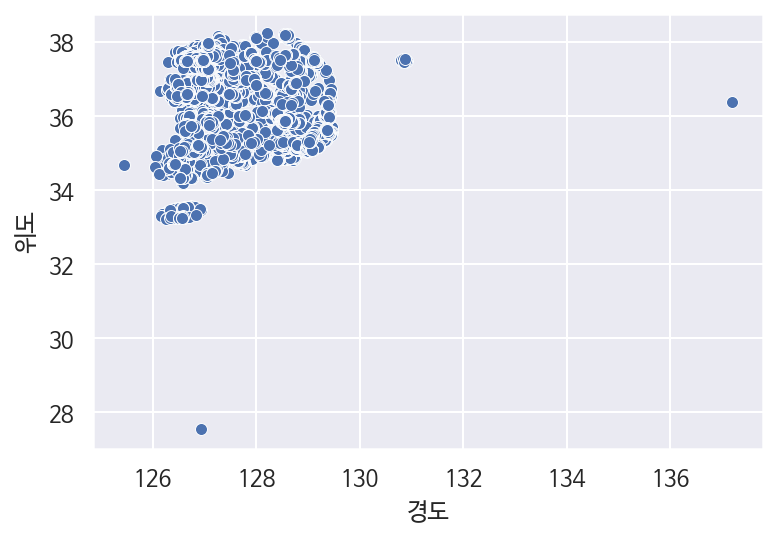

In [45]:
sns.scatterplot(data=df, x="경도", y="위도") #x="위도", y="경도"로 진행 시 지도가 거꾸로 보임

In [46]:
df_park = df[(df["경도"] < 132) & (df["위도"] > 30)].copy()

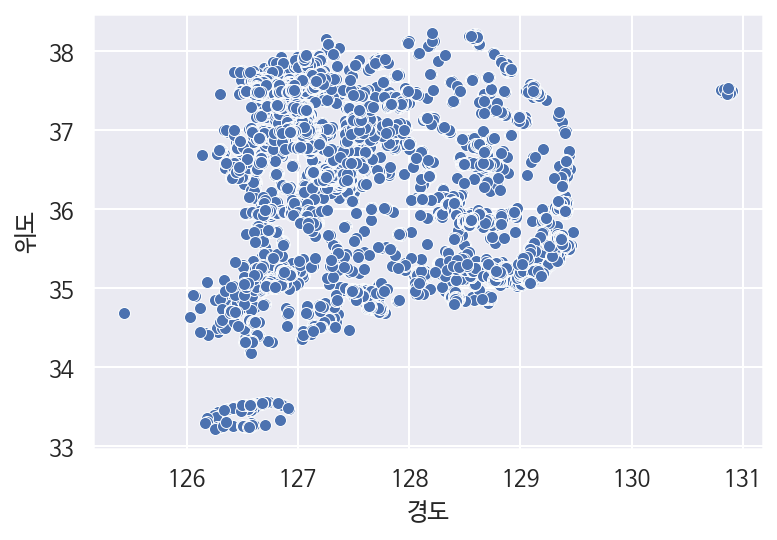

In [48]:
sns.scatterplot(data=df_park, x="경도", y="위도")

In [49]:
df[["위도", "경도"]].describe()

,위도,경도
count,18137.000000,18137.000000
mean,36.335922,127.543937
std,1.051835,0.892670
min,27.551606,125.430955
25%,35.275430,126.872301
50%,36.364729,127.130926
75%,37.404278,128.466193
max,38.224926,137.202661


In [51]:
df[(df["경도"] > 132) | (df["위도"] < 30)]

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
374,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590.0,NaN,NaN,NaN,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구
12926,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.0,NaN,NaN,NaN,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


In [52]:
df["지정고시일"].head(1)

0    2011-09-02
Name: 지정고시일, dtype: object

In [54]:
df["지정고시일"] = pd.to_datetime(df["지정고시일"])
df["지정고시일"].head(1)

0   2011-09-02
Name: 지정고시일, dtype: datetime64[ns]

In [55]:
df["고시연도"] = df["지정고시일"].dt.year
df["고시월"] = df["지정고시일"].dt.month

df[["지정고시일", "고시연도", "고시월"]].head()

,지정고시일,고시연도,고시월
0,2011-09-02,2011.0,9.0
1,2008-02-28,2008.0,2.0
2,2013-01-23,2013.0,1.0
3,1998-07-25,1998.0,7.0
4,1995-04-07,1995.0,4.0


In [56]:
df.loc[df["공원명"].str.contains("화랑"), ["공원명", "고시연도"]]

,공원명,고시연도
3077,판교제8호(화랑)공원,2004.0
4310,화랑공원,2010.0
7316,화랑공원,1972.0
10490,화랑,2004.0
10763,화랑공원,1980.0
15066,화랑,1991.0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


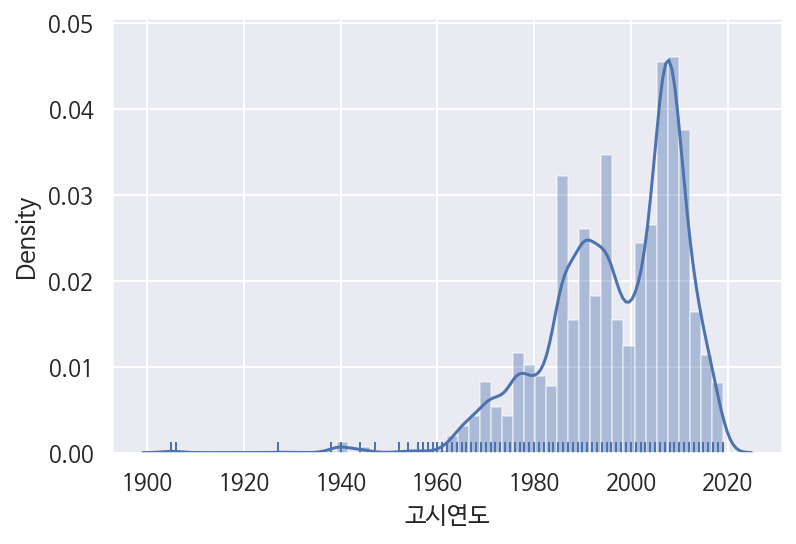

In [57]:
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"], rug=True)

In [58]:
year_month = pd.pivot_table(df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & 
                        (year_month.index < 2019)]
year_month.astype(int).style.background_gradient()

고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,48,12,7,42,21,16,6,16,30,36,37,40
2002.0,38,19,18,10,18,14,49,17,7,7,59,55
2003.0,21,13,17,19,10,23,4,8,7,18,48,38
2004.0,48,18,16,18,13,24,7,48,10,24,59,135
2005.0,55,32,18,23,43,33,16,62,18,34,60,105
2006.0,84,34,69,31,54,32,18,33,24,36,119,120
2007.0,69,12,9,42,16,46,62,66,84,164,245,106
2008.0,163,45,77,42,30,102,15,61,32,20,24,126
2009.0,59,31,162,135,57,60,36,23,96,27,73,100
